# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

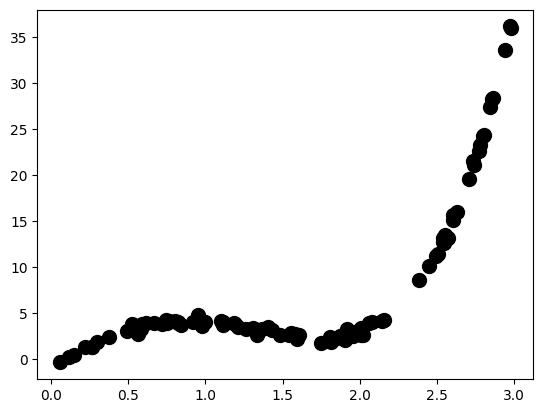

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(30), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([ 3.5091572 ,  2.48751141,  3.96840896,  1.48644599,  1.48140152,
        1.14205159,  4.03931621, 22.84768296,  3.78176559,  3.39665532,
        3.40866411,  3.01914938, 27.80105258,  3.78374368, 34.07203127,
        4.04776266,  4.02770715, 19.21798841,  2.72409228,  9.5220954 ,
       14.01787479,  3.6522062 , 20.71609534, 11.47244202,  2.33008339,
        3.59382549,  2.51844945,  2.78307974, 12.85649566,  3.29366092,
        3.64255013,  4.0149564 , 20.36722414,  2.6340031 ,  3.22105322,
        7.63355451,  3.03639603,  3.52072508, 28.09230662,  2.24203079])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.9876263025275976
Explained variance score: 0.9876263025275976
Median absolute error: 0.21316315051985824
Mean squared error: 1.1198971133831064
Mean absolute errors: 0.484317142793266


# Zadanie
Wylicz powyższe miary dla wszytkich modeli:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

In [7]:
for deg in [1,2,3,4,5,25]:
    model = make_pipeline(PolynomialFeatures(deg), linear_model.LinearRegression())
    model.fit(X_train, y_train)
    
    EVS = metrics.explained_variance_score(y_test, model.predict(X_test))
    MAE = metrics.median_absolute_error(y_test, model.predict(X_test))
    MSE = metrics.mean_squared_error(y_test, model.predict(X_test))
    MAE = metrics.mean_absolute_error(y_test, model.predict(X_test))
    
    print(f'def={deg}\t| EVS={EVS:6.5}\t| MAE={MAE:6.5}\t| MSE={MSE:6.5}\t| MAE={MAE:6.5}')

print("\n\nMAE - Mean Absolute Error\nMSE - Mean Squared Error\nMedAE - Median Absolute Error\nR2 - R^2\nEVS - Explained Variance Score")

def=1	| EVS=0.57102	| MAE=4.5428	| MSE=36.932	| MAE=4.5428
def=2	| EVS=0.85126	| MAE=3.0159	| MSE=12.649	| MAE=3.0159
def=3	| EVS=0.9919	| MAE=0.64722	| MSE=0.67709	| MAE=0.64722
def=4	| EVS=0.99888	| MAE=0.25099	| MSE=0.09485	| MAE=0.25099
def=5	| EVS=0.99887	| MAE=0.25467	| MSE=0.096489	| MAE=0.25467
def=25	| EVS=0.98781	| MAE=0.48118	| MSE=1.0984	| MAE=0.48118


MAE - Mean Absolute Error
MSE - Mean Squared Error
MedAE - Median Absolute Error
R2 - R^2
EVS - Explained Variance Score
